# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City count: {len(cities)}")

City count: 577


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## Set OpenWeather API base url
ow_url = "http://api.openweathermap.org/data/2.5/weather?q="
## Set Units
units = "imperial"

## Create weather data empty list
weather_data = []
## Set initial values
record = 1

## Print Log Header
print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
        ##
        query_url = f"{ow_url}{city}&appid={ow_key}&units={units}"
        response = requests.get(query_url).json()
        try:
            ## Print Log Status
            print(f"Processing Record {record:>2d} | City Id = {response['id']:<7d} [{city}]")
            ## Retrieve weather data from OpenWeather API (response)
            weather_data.append({
                'City': response['name'],
                'Lat': response['coord']['lat'],
                'Lng': response['coord']['lon'],
                'Max Temp': response['main']['temp_max'],
                'Humidity': response['main']['humidity'],
                'Cloudiness': response['clouds']['all'],
                'Wind Speed': response['wind']['speed'],
                'Country': response['sys']['country'],
                'Date': response['dt']
            })
            ## Record counter
            record += 1
        except KeyError:
            ## Print Log Status
            print(f"City [{city}] not found. Skipping...")
            pass

## Print Log Footer
print("------------------------------")        
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record  1 | City Id = 101312  [turayf]
Processing Record  2 | City Id = 3355672 [luderitz]
City [barentsburg] not found. Skipping...
Processing Record  3 | City Id = 934322  [mahebourg]
Processing Record  4 | City Id = 5074792 [papillion]
Processing Record  5 | City Id = 933995  [souillac]
Processing Record  6 | City Id = 6690296 [saint-joseph]
Processing Record  7 | City Id = 123941  [minab]
Processing Record  8 | City Id = 3577430 [road town]
Processing Record  9 | City Id = 1649150 [bengkulu]
Processing Record 10 | City Id = 2123979 [kurilsk]
Processing Record 11 | City Id = 4031742 [egvekinot]
Processing Record 12 | City Id = 4030556 [rikitea]
Processing Record 13 | City Id = 4726521 [san patricio]
City [attawapiskat] not found. Skipping...
Processing Record 14 | City Id = 3874787 [punta arenas]
Processing Record 15 | City Id = 3833367 [ushuaia]
Processing Record 16 | City Id = 4031574 [provideniya]
City [kamenskoye

Processing Record 144 | City Id = 5924351 [clyde river]
Processing Record 145 | City Id = 1626703 [soe]
Processing Record 146 | City Id = 116406  [semirom]
Processing Record 147 | City Id = 6089245 [norman wells]
Processing Record 148 | City Id = 3007608 [lannion]
Processing Record 149 | City Id = 1507390 [dikson]
Processing Record 150 | City Id = 3146487 [raudeberg]
Processing Record 151 | City Id = 2167426 [emerald]
Processing Record 152 | City Id = 477940  [ust-tsilma]
Processing Record 153 | City Id = 1862415 [kumano]
Processing Record 154 | City Id = 789996  [istok]
Processing Record 155 | City Id = 3430443 [necochea]
City [cagayan de tawi-tawi] not found. Skipping...
Processing Record 156 | City Id = 2413419 [gunjur]
Processing Record 157 | City Id = 3141667 [roald]
Processing Record 158 | City Id = 2441530 [madaoua]
Processing Record 159 | City Id = 557140  [ilinskiy]
Processing Record 160 | City Id = 2015306 [tiksi]
Processing Record 161 | City Id = 1170290 [mirpur sakro]
Proce

Processing Record 292 | City Id = 2194098 [ahipara]
Processing Record 293 | City Id = 293842  [gat]
Processing Record 294 | City Id = 80509   [bardiyah]
Processing Record 295 | City Id = 6096551 [pangnirtung]
Processing Record 296 | City Id = 515879  [oktyabrskiy]
Processing Record 297 | City Id = 779683  [hammerfest]
Processing Record 298 | City Id = 2079582 [alyangula]
Processing Record 299 | City Id = 4535961 [enid]
Processing Record 300 | City Id = 3992842 [petatlan]
Processing Record 301 | City Id = 1863997 [fukue]
Processing Record 302 | City Id = 103630  [najran]
Processing Record 303 | City Id = 1166819 [rojhan]
Processing Record 304 | City Id = 3988392 [rosarito]
Processing Record 305 | City Id = 893485  [chiredzi]
Processing Record 306 | City Id = 2318044 [yola]
Processing Record 307 | City Id = 6255012 [flinders]
Processing Record 308 | City Id = 1501000 [kyshtovka]
Processing Record 309 | City Id = 4165576 [naples park]
Processing Record 310 | City Id = 878281  [lindi]
Proc

Processing Record 440 | City Id = 3577154 [oranjestad]
Processing Record 441 | City Id = 2610806 [vagur]
Processing Record 442 | City Id = 5882953 [aklavik]
Processing Record 443 | City Id = 1648082 [boyolangu]
Processing Record 444 | City Id = 3853354 [junin]
Processing Record 445 | City Id = 1623197 [tual]
Processing Record 446 | City Id = 1803245 [lishui]
Processing Record 447 | City Id = 3663517 [manaus]
Processing Record 448 | City Id = 1791779 [wanning]
Processing Record 449 | City Id = 1283217 [khandbari]
Processing Record 450 | City Id = 1805733 [jinchang]
Processing Record 451 | City Id = 1274055 [chitrakonda]
Processing Record 452 | City Id = 5983607 [inuvik]
Processing Record 453 | City Id = 3470137 [belmonte]
Processing Record 454 | City Id = 370510  [marabba]
Processing Record 455 | City Id = 3420768 [qasigiannguit]
Processing Record 456 | City Id = 943032  [volksrust]
Processing Record 457 | City Id = 4301317 [morehead]
Processing Record 458 | City Id = 780643  [bjornevat

In [4]:
# Print the city count to confirm updated count
print(f"Updated city count: {len(weather_data)}")

Updated city count: 538


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
## Build DataFrame
raw_city_data = pd.DataFrame(data = weather_data)

## Export DataFrame (of all retrieved data) to CSV
raw_city_data.to_csv('Output/Cities.csv', index=False, header=True, encoding='utf-8')

## Display DataFrame
raw_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turaif,31.6725,38.6637,66.20,30,0,8.05,SA,1619650665
1,Lüderitz,-26.6481,15.1594,60.84,76,0,17.20,NA,1619650666
2,Mahébourg,-20.4081,57.7000,75.00,92,96,7.00,MU,1619650666
3,Papillion,41.1544,-96.0422,68.00,56,75,3.44,US,1619650596
4,Souillac,-20.5167,57.5167,75.00,92,87,7.00,MU,1619650666


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
## Inspect data to check max humidity is equal or less than 100%
raw_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,19.201909,19.575441,62.197063,70.713755,54.213755,7.530799,1.619651e+09
std,33.106415,90.779467,19.094921,21.868147,37.187091,4.816016,1.028041e+02
min,-54.800000,-179.166700,14.320000,7.000000,0.000000,0.130000,1.619650e+09
25%,-8.651525,-58.715150,50.005000,60.000000,20.000000,4.215000,1.619651e+09
50%,21.178850,22.712450,66.200000,76.000000,60.000000,6.690000,1.619651e+09
75%,46.037000,102.242600,77.330000,87.000000,90.000000,9.820000,1.619651e+09
max,78.218600,179.316700,94.280000,100.000000,100.000000,31.070000,1.619651e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = raw_city_data.loc[raw_city_data['Humidity']>100].index
print(f"Number of cities with humidity over 100%: {len(outlier_index)}")
print(f"Indices: {outlier_index}")

Number of cities with humidity over 100%: 0
Indices: Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_city_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turaif,31.6725,38.6637,66.20,30,0,8.05,SA,1619650665
1,Lüderitz,-26.6481,15.1594,60.84,76,0,17.20,NA,1619650666
2,Mahébourg,-20.4081,57.7000,75.00,92,96,7.00,MU,1619650666
3,Papillion,41.1544,-96.0422,68.00,56,75,3.44,US,1619650596
4,Souillac,-20.5167,57.5167,75.00,92,87,7.00,MU,1619650666


In [9]:
## Inspect data to check max humidity is equal or less than 100%
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,19.201909,19.575441,62.197063,70.713755,54.213755,7.530799,1.619651e+09
std,33.106415,90.779467,19.094921,21.868147,37.187091,4.816016,1.028041e+02
min,-54.800000,-179.166700,14.320000,7.000000,0.000000,0.130000,1.619650e+09
25%,-8.651525,-58.715150,50.005000,60.000000,20.000000,4.215000,1.619651e+09
50%,21.178850,22.712450,66.200000,76.000000,60.000000,6.690000,1.619651e+09
75%,46.037000,102.242600,77.330000,87.000000,90.000000,9.820000,1.619651e+09
max,78.218600,179.316700,94.280000,100.000000,100.000000,31.070000,1.619651e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
## SET PARAMETERS

## Date of analysis: Get current time and covert date to string (mm/dd/yyyy)
date = time.strftime('%m-%d-%Y')

## Set initial values
figure_num = 1

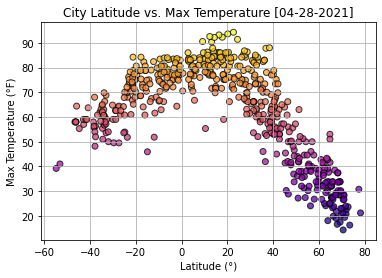

In [11]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## Show grid
plt.grid()
# Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Humidity Plot

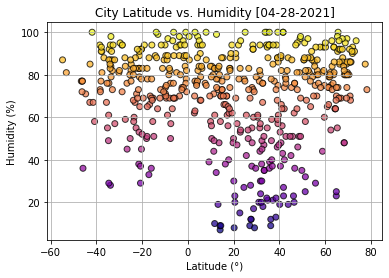

In [12]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='orange', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Humidity [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Cloudiness Plot

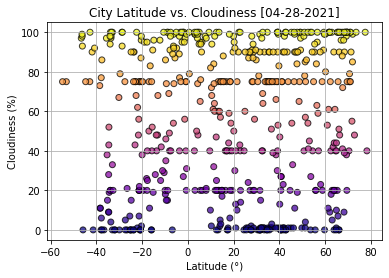

In [13]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='purple', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Cloudiness [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Wind Speed Plot

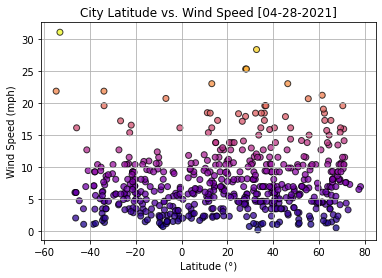

In [14]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='green', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Wind Speed [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Linear Regression

In [15]:
## SEPARATE NORTHERN & SOUTHERN HEMISPHERES (get .loc booleans)
## Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemisphere = clean_city_data["Lat"] >= 0
## Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere = clean_city_data["Lat"] < 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear reggression coefficient of detemination R^2 is: 79.95%


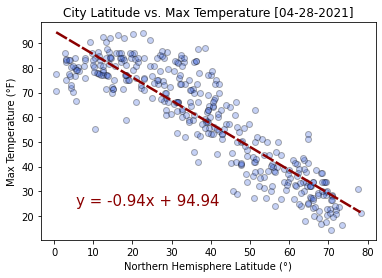

In [16]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat'].loc[north_hemisphere]
y_values = clean_city_data['Max Temp'].loc[north_hemisphere]

## LINEAR REGRESSION
## Compute Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
## Set regression line parameters (x0-x1)
regress_line_x = (min(x_values), max(x_values))
## Set regression line parameters (y0-y1)
regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
# Set regresion line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='royalblue', alpha=0.3, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Northern Hemisphere Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## REGRESSION LINE PLOT
## Set Line Plot parameters
plt.plot(regress_line_x, regress_line_y, linestyle=(0, (5, 1)), color='darkred', alpha=1, linewidth=2.5)
## Annotate regression line equation
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+10), fontsize=15, color='darkred')

## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1

## Print r-value
print(f"The linear reggression coefficient of detemination R^2 is: {rvalue**2:.2%}")

## Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear reggression coefficient of detemination R^2 is: 55.23%


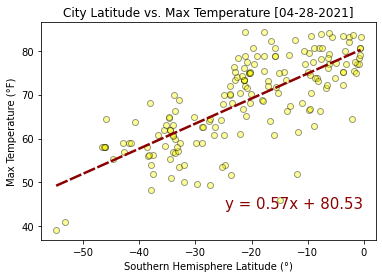

In [17]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat'].loc[south_hemisphere]
y_values = clean_city_data['Max Temp'].loc[south_hemisphere]

## LINEAR REGRESSION
## Compute Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
## Set regression line parameters (x0-x1)
regress_line_x = (min(x_values), max(x_values))
## Set regression line parameters (y0-y1)
regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
# Set regresion line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='yellow', alpha=0.4, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Southern Hemisphere Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## REGRESSION LINE PLOT
## Set Line Plot parameters
plt.plot(regress_line_x, regress_line_y, linestyle=(0, (5, 1)), color='darkred', alpha=1, linewidth=2.5)
## Annotate regression line equation
plt.annotate(line_eq, (min(x_values)+30, min(y_values)+5), fontsize=15, color='darkred')

## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1

## Print r-value
print(f"The linear reggression coefficient of detemination R^2 is: {rvalue**2:.2%}")

## Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression